#  ***ZOMATO RESTAURANT RECOMMANDATION SYSTEM***








# Mount the dataset into colab notebook.

In [141]:
 # Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Upload the image

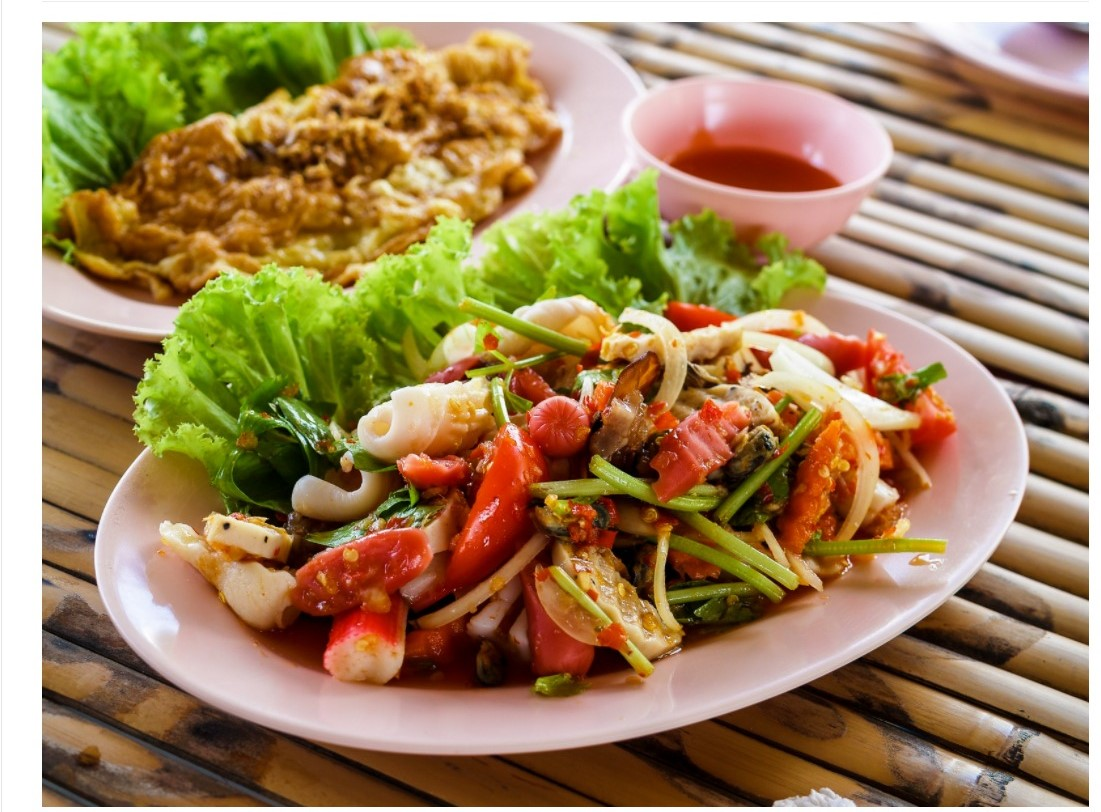

In [142]:
#Upload the image
from IPython import display
display.Image("/content/drive/MyDrive/dataset/image.jpeg",width=800)

# Importing libraries.

In [143]:
#Importing Libraries
import numpy as np #NumPy is a general-purpose array-processing package.
import pandas as pd #It contains high-level data structures and manipulation tools designed to make data analysis fast and easy.
import matplotlib.pyplot as plt #It is a Plotting Library
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib.
import seaborn as sb  
from sklearn.metrics import r2_score

#Loading and reading a dataset.

In [144]:
zomato_data=pd.read_csv("/content/drive/MyDrive/dataset/zomato.csv")
zomato_data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Data cleaning 
* Deleting redundant columns.
* Renaming the columns.
* Dropping duplicates.
* Cleaning individual columns.
* Remove the NaN values from the dataset
* Some Transformations



Looking at the information about dataset,datatypes of the corresponding columns and missing values.

In [145]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

#Checking NULL values.

In [146]:
zomato_data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

# Deleting unnecessary columns. 
 Droping the columns "url" , "dish_like" , "phone"and saving the dataset as 'zomato".

In [147]:
zomato=zomato_data.drop(['url','phone','address','location','rest_type', 'menu_item', 'votes'],axis=1)

#Removing the duplicates.

In [148]:
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

#Remove the NaN values from the dataset.

In [149]:
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23462 entries, 0 to 51715
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         23462 non-null  object
 1   online_order                 23462 non-null  object
 2   book_table                   23462 non-null  object
 3   rate                         23462 non-null  object
 4   dish_liked                   23462 non-null  object
 5   cuisines                     23462 non-null  object
 6   approx_cost(for two people)  23462 non-null  object
 7   reviews_list                 23462 non-null  object
 8   listed_in(type)              23462 non-null  object
 9   listed_in(city)              23462 non-null  object
dtypes: object(10)
memory usage: 2.0+ MB


#Reading column names

In [150]:
#Reading column names
zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

#Changing the Columns Names.

In [151]:
#Changing the Columns Names
zomato.columns
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'dish_liked', 'cuisines',
       'cost', 'reviews_list', 'type', 'city'],
      dtype='object')

#Some Transformations.

In [152]:
#Changaing the cost to string.
zomato['cost'] = zomato['cost'].astype(str)

#Using lambda function to replace ',' from cost.
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.'))

# Changing the cost to folat.
zomato['cost'] = zomato['cost'].astype(float)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23462 entries, 0 to 51715
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          23462 non-null  object 
 1   online_order  23462 non-null  object 
 2   book_table    23462 non-null  object 
 3   rate          23462 non-null  object 
 4   dish_liked    23462 non-null  object 
 5   cuisines      23462 non-null  object 
 6   cost          23462 non-null  float64
 7   reviews_list  23462 non-null  object 
 8   type          23462 non-null  object 
 9   city          23462 non-null  object 
dtypes: float64(1), object(9)
memory usage: 2.0+ MB


#Reading rate dataset.

In [153]:
#Reading rate dataset.
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '2.8 /5', '3.2 /5', '3.0 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

#Removing '/5' from Rates.

In [154]:
#Removing NEW' from Rates 
zomato = zomato.loc[zomato.rate !='NEW']

#Removing '-' from Rates 
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)

#Removing '/5' from Rates 
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x

#Convert type as folat
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')
zomato['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [155]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23315 entries, 0 to 23314
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          23315 non-null  object 
 1   online_order  23315 non-null  object 
 2   book_table    23315 non-null  object 
 3   rate          23315 non-null  float64
 4   dish_liked    23315 non-null  object 
 5   cuisines      23315 non-null  object 
 6   cost          23315 non-null  float64
 7   reviews_list  23315 non-null  object 
 8   type          23315 non-null  object 
 9   city          23315 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.8+ MB


# Adjust the column names.

In [156]:
#Apply lambda function on online_order,book_table
zomato.name = zomato.name.apply(lambda x:x.title())

#Convert columns values as boolean type
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)
zomato.cost.unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 750.  , 200.  , 850.  ,   1.2 , 150.  , 350.  , 250.  ,
         1.5 ,   1.3 ,   1.  , 100.  , 900.  ,   1.1 ,   1.6 , 950.  ,
       230.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,   1.8 ,   1.9 ,
       180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,   3.4 ,  40.  ,
         1.25,   3.5 ,   4.  ,   2.4 ,   1.45,   3.2 ,   6.  ,   1.05,
         4.1 ,   2.3 , 120.  ,   2.6 ,   5.  ,   3.7 ,   1.65,   2.7 ,
         4.5 ])

#Get Correlation between different variables.

Index(['name', 'online_order', 'book_table', 'rate', 'dish_liked', 'cuisines',
       'cost', 'reviews_list', 'type', 'city'],
      dtype='object')

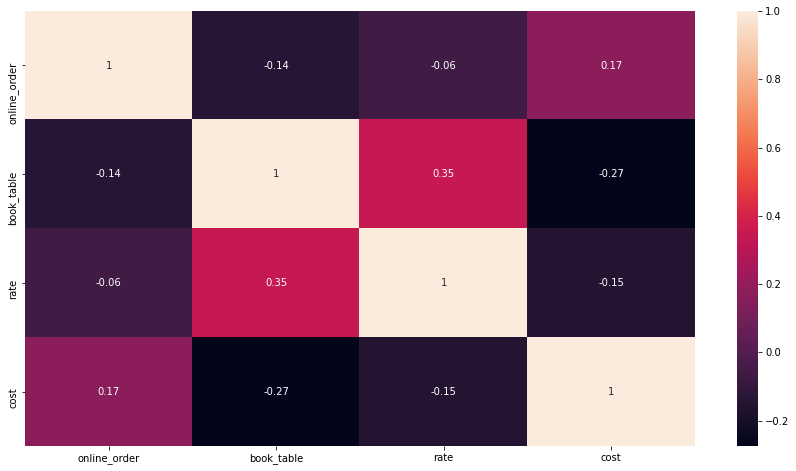

In [169]:
#Get Correlation between different variables
corr = zomato.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
zomato.columns

The highest correlation is between name and address which is 0.35 which is not of very much concern


# Data Visualization.


#Restaurants delivering Online or not
#Analyzing the restaurants based on availability of online order facility

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000., 18000.]), <a list of 10 Text major ticklabel objects>)

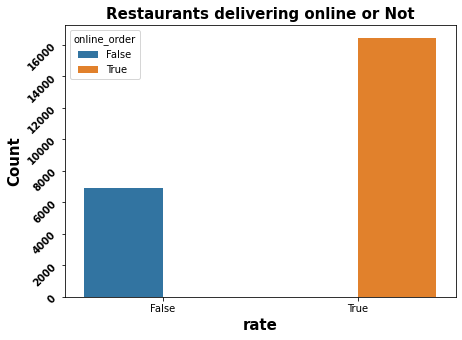

In [158]:
#Restaurants delivering online or Not
plt.title('Restaurants delivering online or Not', weight = 'bold',size=15)
fig = plt.gcf()
fig.set_size_inches(7,5)
sns.countplot(x="online_order", hue="online_order", data=zomato)
plt.ylabel("Count",size=15,fontweight='bold')
plt.xlabel("rate",size=15,fontweight='bold')
plt.yticks(rotation=45,fontweight='bold')


 The above graph we have almost more than 16000 Restaurants in Bangalore that Accepts online orders through zomato and Almost of 7000 are not accpeting any online orders through zomato.

#Does online order facility impacts the rating of the restaurant?

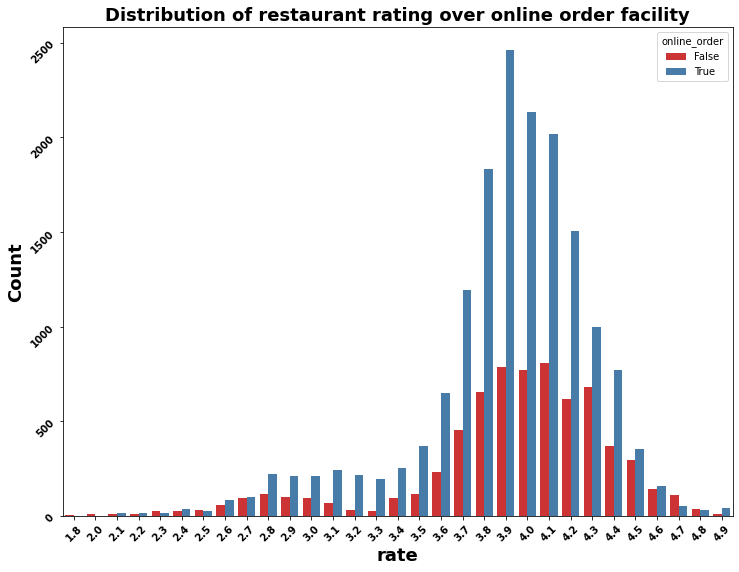

In [159]:
#Does online order facility impacts the rating of the restaurant
sns.countplot(hue = zomato["online_order"], palette = "Set1", x = zomato["rate"])
fig = plt.gcf()
fig.set_size_inches(12,9)
plt.title("Distribution of restaurant rating over online order facility",size=18,fontweight='bold')
plt.ylabel("Count",size=18,fontweight='bold')
plt.xlabel("rate",size=18,fontweight='bold')
plt.xticks(rotation=45,fontweight='bold')
plt.yticks(rotation=45,fontweight='bold')
plt.show()

Restaurants which provide online order facility has better ratings than the traditional restaurants. It makes sense because many software employees stay in Bangalore and they tend to order a lot of food through the online.

# Restaurants allowing table booking or not.

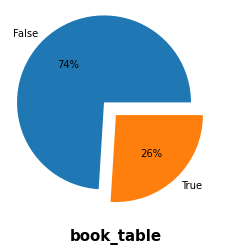

In [170]:
#Restaurants allowing table booking or not
slices=zomato['book_table'].value_counts().values
labels=zomato['book_table'].value_counts().index
explode = (0.2, 0)
plt.pie(slices,labels=labels,explode = explode,autopct="%.0f%%")
explode = explode
plt.xlabel("book_table",size=15,fontweight='bold')
plt.show()


Almost 74 percent of restaurants in Banglore do not provide table booking facility.and 26 percent of restaurant provide table booking In India you cannot find table booking facility in any average restaurants,usually only five star restaurants provides table booking.

#Does book table facility impacts the rating of the restaurant?

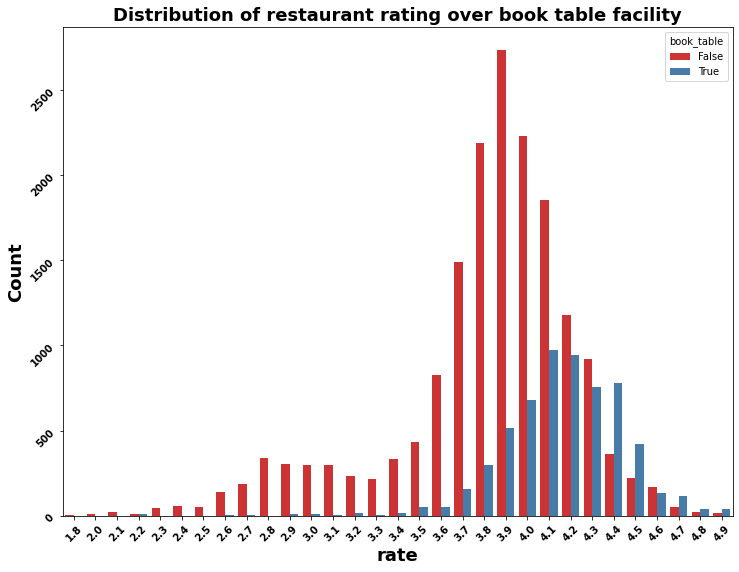

In [171]:
#Does book table facility impacts the rating of the restaurant?
sns.countplot(hue = zomato["book_table"], palette = "Set1", x = zomato["rate"])
fig = plt.gcf()
fig.set_size_inches(12,9)
plt.title("Distribution of restaurant rating over book table facility",size=18,fontweight='bold')
plt.ylabel("Count",size=18,fontweight='bold')
plt.xlabel("rate",size=18,fontweight='bold')
plt.xticks(rotation=45,fontweight='bold')
plt.yticks(rotation=45,fontweight='bold')
plt.show()

Here, we do see some variation.
There are hardly any restaurants with rating from 1.8 to 3.5 that do offer the facility to book table, however the number increases for ratings from 3.8 to 4.4.
The highest number of restaurants that do not offer the facility to book table has the rating 3.7, followed by 3.8.
We conclude that in low rated restaurants you can not book table, however the high rated restaurants do offer this facility.


# City of Restaurants:-

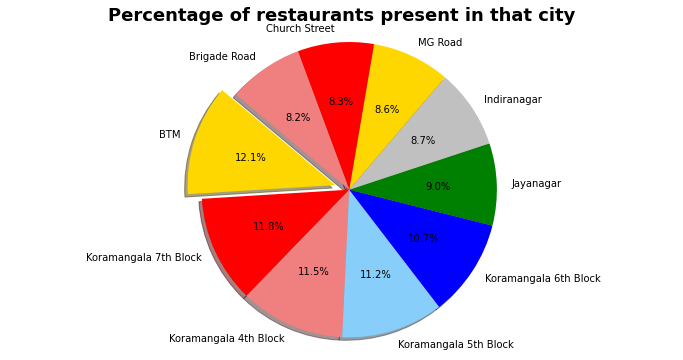

In [162]:
#City of Restaurants
plt.figure(figsize = (12,6))
names = zomato['city'].value_counts()[:10].index
values = zomato['city'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that city", weight = 'bold',size=18)
plt.show()

 We know that pie graph is always a composition of 100% and From the Pie Graph above you can see only The Top 10 cities .
        


#Name Vs Number of Restaurants

Text(0.5, 1.0, 'Top 20 restaurants by name')

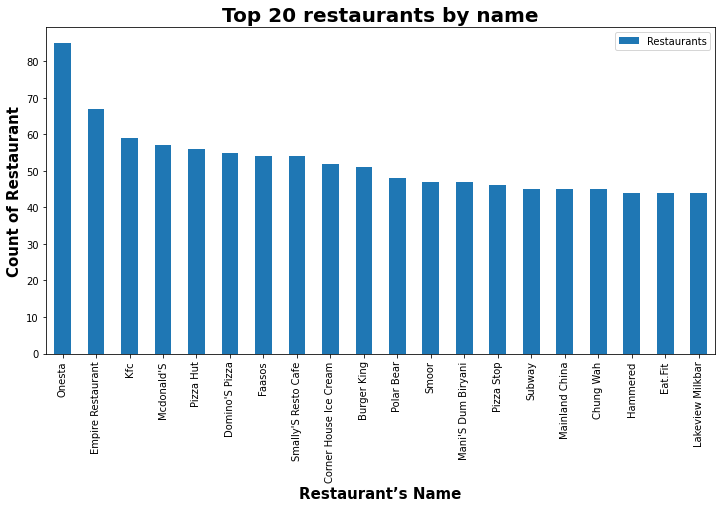

In [163]:
plt.figure(figsize=(12,6))
ax =zomato.name.value_counts()[:20].plot(kind='bar')
ax.legend(['Restaurants'])
plt.xlabel('Restaurant’s Name',fontsize=15, weight='bold')
plt.ylabel('Count of Restaurant',fontsize=15, weight='bold')
plt.title("Top 20 restaurants by name", fontsize=20, weight='bold')

from the above graph, we can see that we almost have 100 restaurants for the cafe coffee day.

# Type of service

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 7 Text major ticklabel objects>)

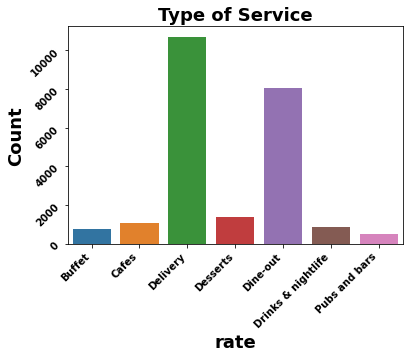

In [164]:
sns.countplot(zomato['type'])
sns.countplot(zomato['type']).set_xticklabels(sns.countplot(zomato['type']).get_xticklabels(), rotation=90, ha="right")
plt.title('Type of Service',size=18,fontweight='bold')
plt.ylabel("Count",size=18,fontweight='bold')
plt.xlabel("rate",size=18,fontweight='bold')
plt.xticks(rotation=45,fontweight='bold')
plt.yticks(rotation=45,fontweight='bold')


We see that the majority of restaurants offer delivery, which might account for the above conclusion that people at Bangalore prefer to eat at home.
Pubs and Bars and Buffet are offered by very less number of restaurants.

# Rate distribution





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


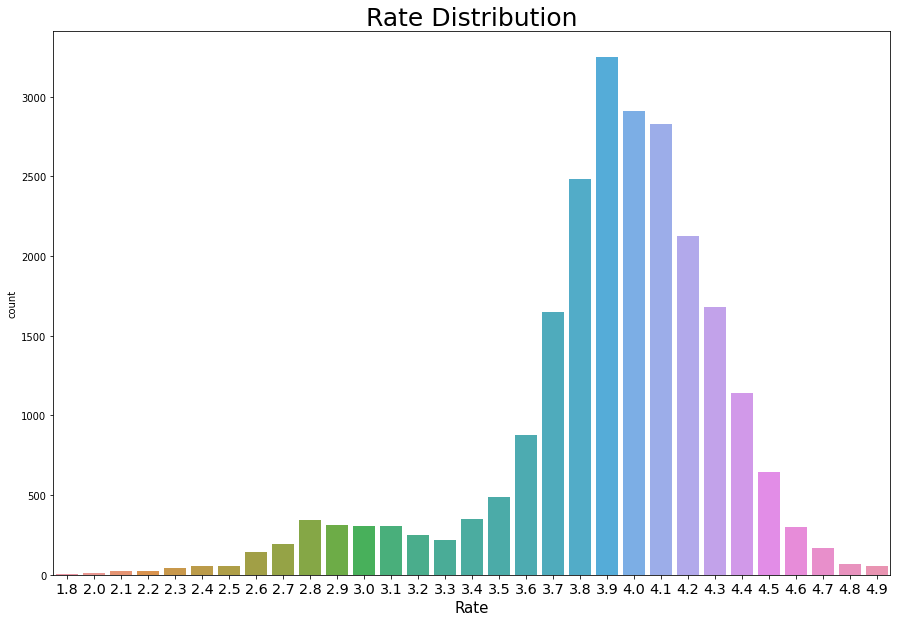

In [165]:
plt.figure(figsize=(15,10))
sns.countplot(zomato['rate'])
plt.title('Rate Distribution', fontsize=25)
plt.xlabel('Rate', fontsize=15)
plt.xticks(fontweight='light',fontsize='x-large')
plt.show()


The majority of restaurants are rated 3.9, followed by 3.8 and 3.7, which are decent ratings. This means that most of the restaurants at Bangalore are liked by the citizens and hence rated above average. This shows that due to high rise in the number of restaurants in Bangalore there is tough competition between restaurants as they are trying to excel in quality and services to increase the number of customers.

# Restaurant types

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]), <a list of 10 Text major ticklabel objects>)

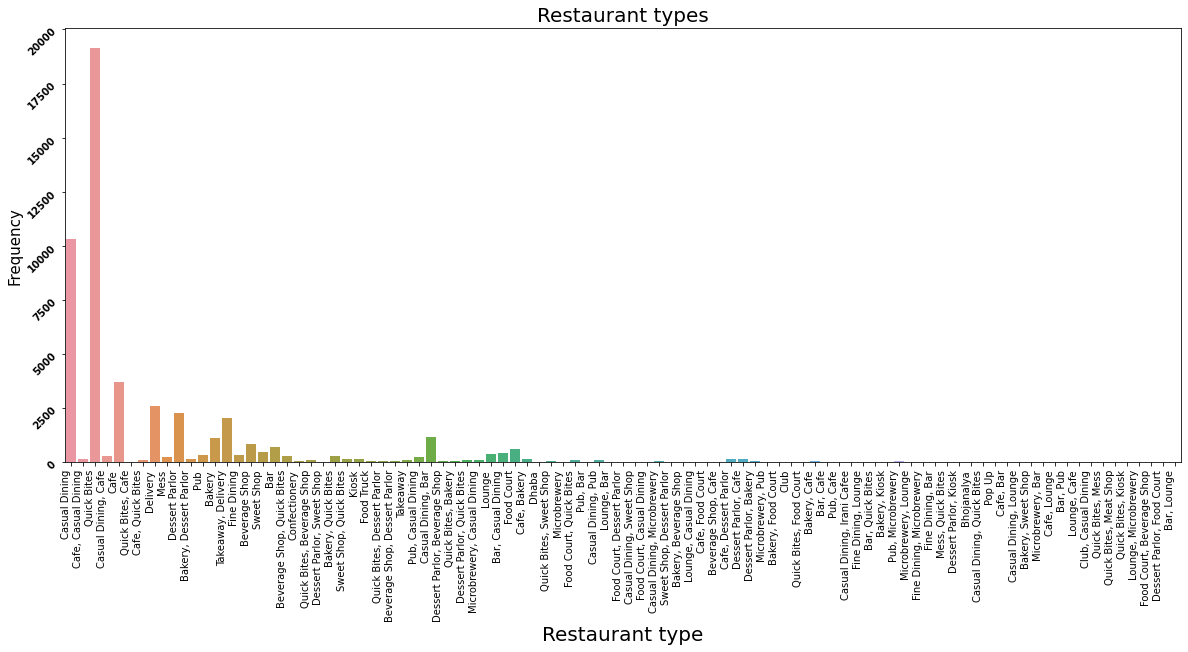

In [166]:
fig = plt.figure(figsize=(20,8))
rest = sns.countplot(x="rest_type",data=zomato_data)
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=20)
plt.title('Restaurant types',fontsize = 20)
plt.yticks(rotation=45,fontweight='bold')


Casual Dining, Quick Bites and Cafe are the 3 most common types of Restaurants in Banglore


#Most famous restaurant chains in Bengaluru.


Text(0.5, 0, 'Number of outlets')

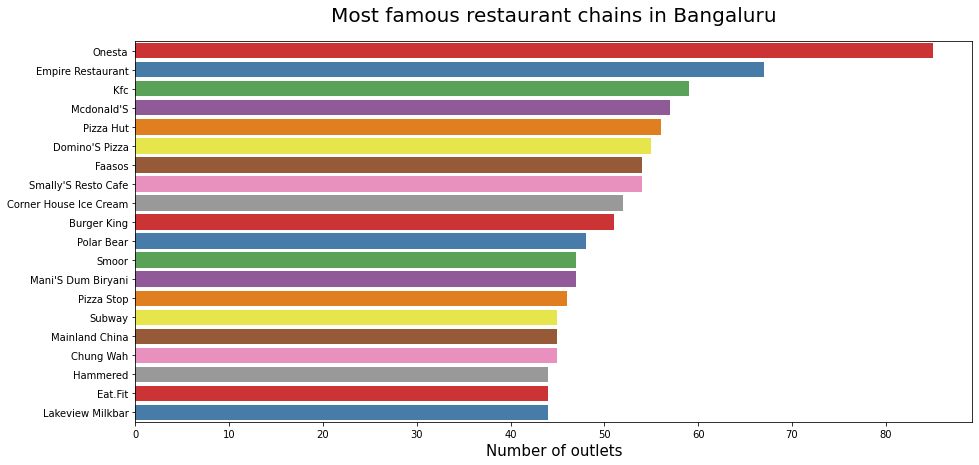

In [167]:
plt.figure(figsize=(15,7))
chains=zomato['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)


As you can see Cafe coffee day,Onesta,Just Bake has the most number of outlets in and around bangalore.